In [1]:
from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd
import numpy as np

In [2]:
# Define search terms
# Should look at 1984 to start
googlenews = GoogleNews(start ='01/01/1990' , end = '01/01/2020')
googlenews.search('"american enterprise institute", "climate change"')
npages = 1

# Get results for first 20 pages
results = []
for i in range(npages):
    googlenews.getpage(i)
    result = googlenews.result()
    results.append(result)
        
results_flat = [item for sublist in results for item in sublist]

In [3]:
test = [results_flat, results_flat]

In [11]:
np.shape(np.array(test).flatten())

(40,)

In [4]:
# Convert list of search results into dataframe
df = pd.DataFrame(results_flat)

In [29]:
df.keys()

Index(['title', 'media', 'date', 'datetime', 'desc', 'link', 'img'], dtype='object')

<AxesSubplot:>

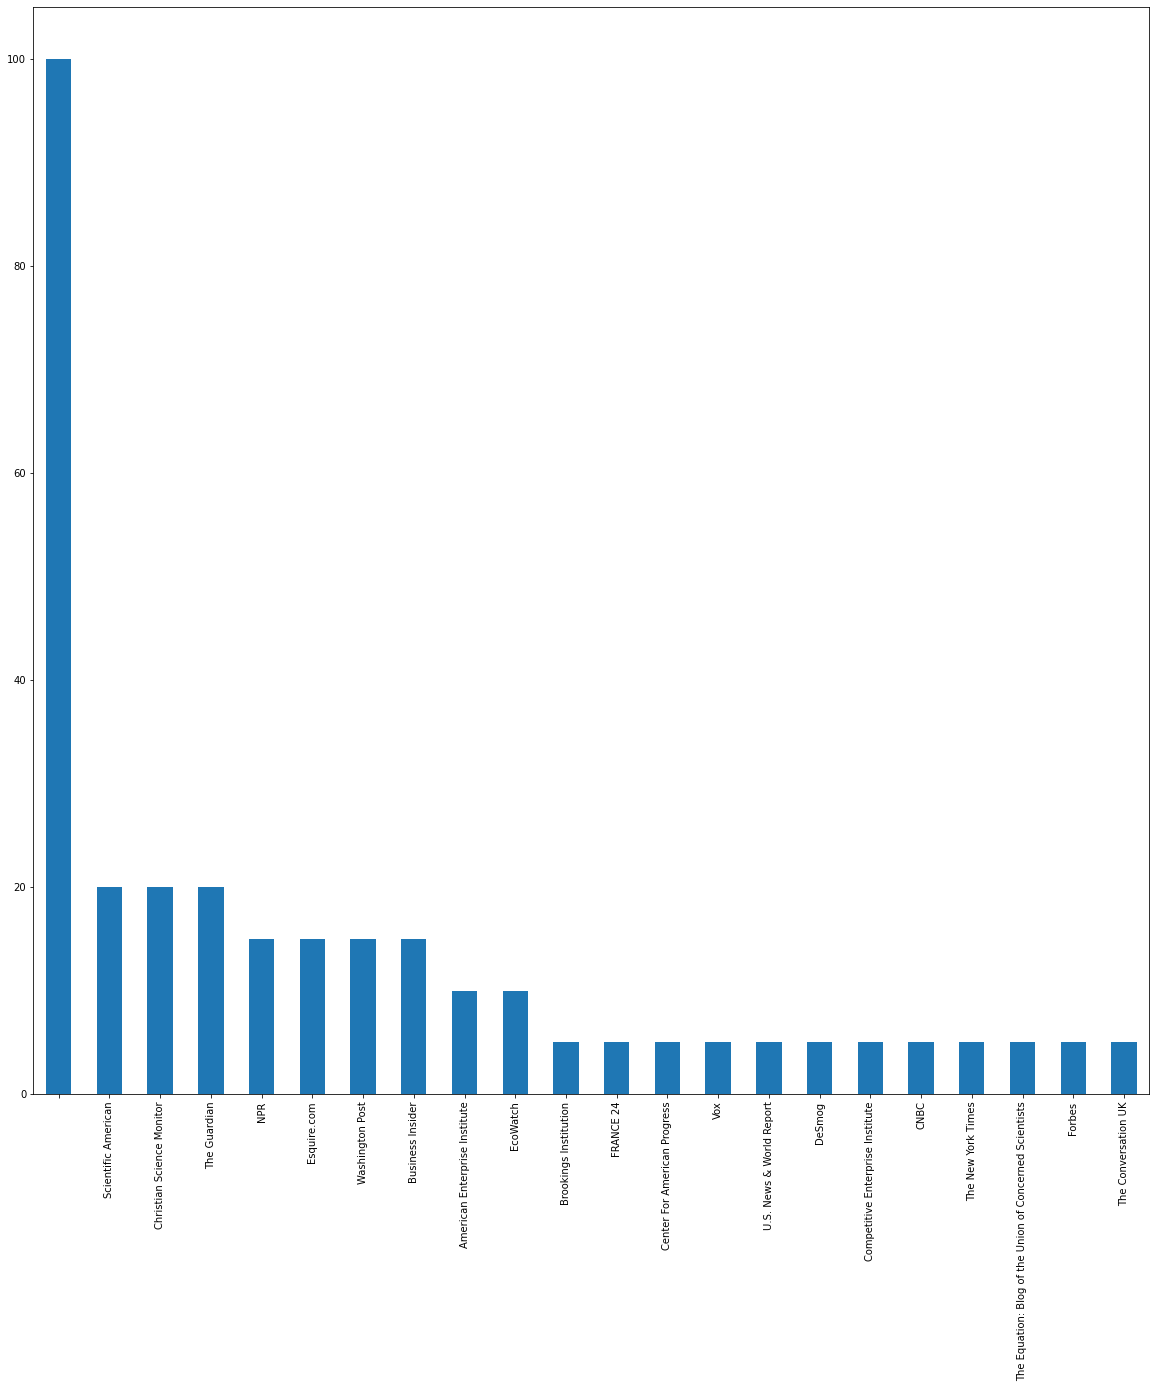

In [30]:
# Histogram of journal
df['media'].value_counts().plot(kind='bar', figsize=(20,20))

In [5]:
articles = []
num = len(df.index)
for n, i in enumerate(df.index):
    print(n/num)
    dico = {}
    article = Article(df['link'][i])
    
    try:

        article.download()
        article.parse()
        dico['authors'] = article.authors
        try:
            dico['year'] = article.publish_date.strftime("%Y")
        except:
            print(article.publish_date)
            dico['year']=None
        dico['text'] = article.text
        #article.nlp()
        #dico['keywords'] = article.keywords
        #dico['summary'] = article.summary
        dico['link'] = df['link'][i]
        articles.append(dico)
    except:
        print(df['media'][i] + ' failed (%i)' %i)
        pass
    

0.0
0.05
0.1
 failed (2)
0.15
0.2
0.25
0.3
None
0.35
0.4
0.45
None
0.5
0.55
0.6
0.65
0.7
0.75
0.8
None
0.85
0.9
0.95
None


In [20]:
len(articles)

118

In [32]:
news_df = pd.DataFrame(articles)
news_df.to_excel('articles_american_enterprise_institute_climate_change_5pgs.xlsx')

<AxesSubplot:>

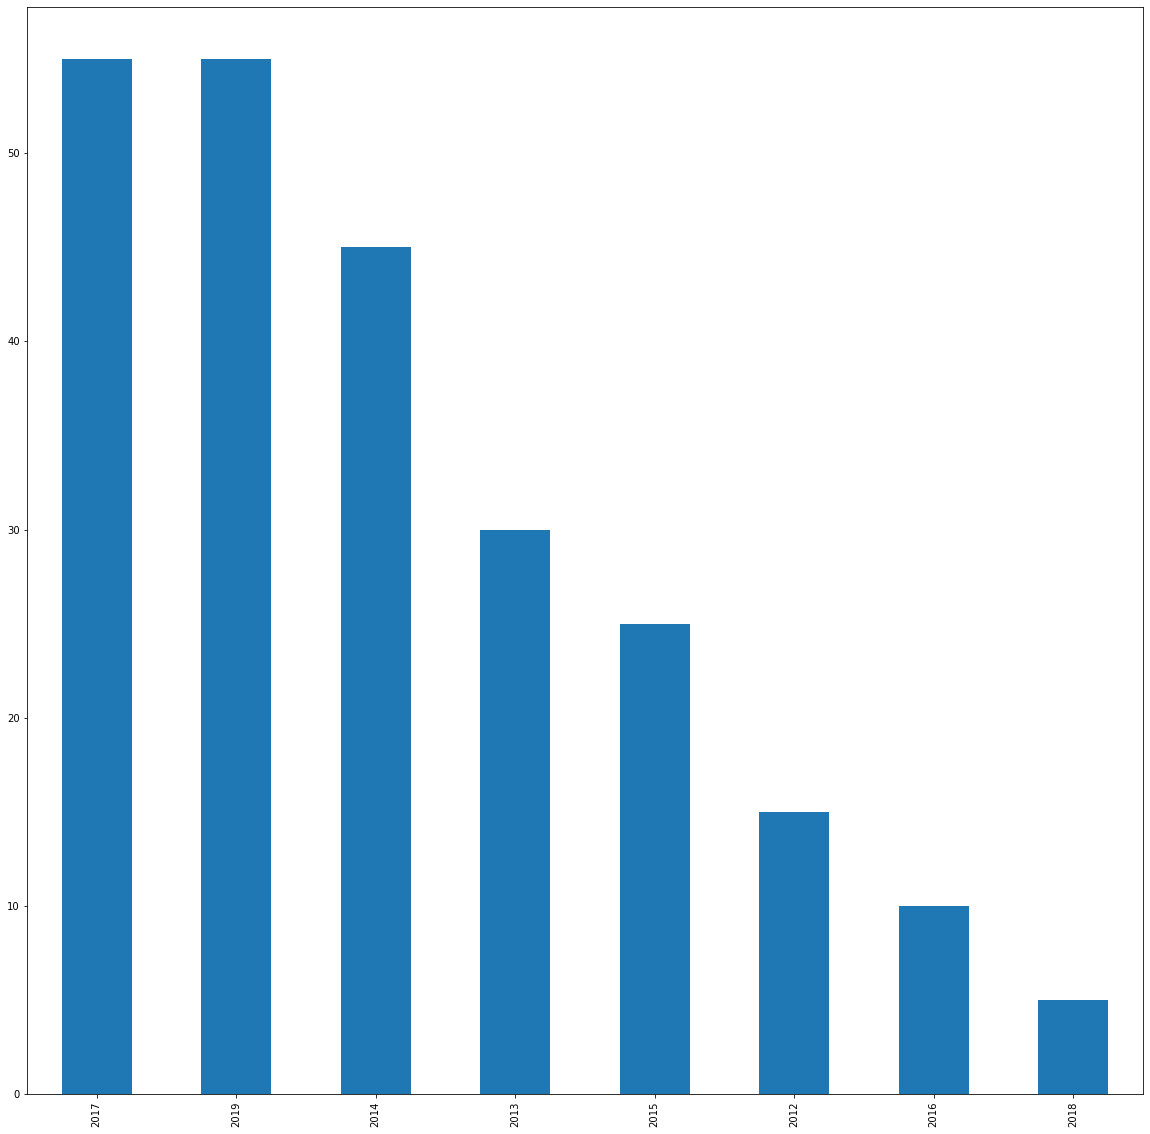

In [26]:
news_df['year'].value_counts().plot(kind='bar', figsize=(20,20))

In [15]:
# Define search terms
# Should look at 1984 to start
googlenews = GoogleNews(start ='01/01/1995' , end = '01/01/2020')
googlenews.search('global warming')
npages = 1

# Get results for first 20 pages
results = []
for i in range(npages):
    googlenews.get_news('global warming')
    result = googlenews.result()
    results.append(result)
        
results_flat = [item for sublist in results for item in sublist]

In [16]:
df2 = pd.DataFrame(results_flat)

In [19]:
df2.keys()

Index(['title', 'media', 'date', 'datetime', 'desc', 'link', 'img', 'site'], dtype='object')